In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe(include="all")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
df.fillna({"director": "Unknown", "cast": "Unknown", "country": "Unknown"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.dropna(subset=["rating", "duration"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      8800 non-null   object
 4   cast          8800 non-null   object
 5   country       8800 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


In [9]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

/tmp/ipykernel_13/933057586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)


In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      8800 non-null   object
 4   cast          8800 non-null   object
 5   country       8800 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-poster")

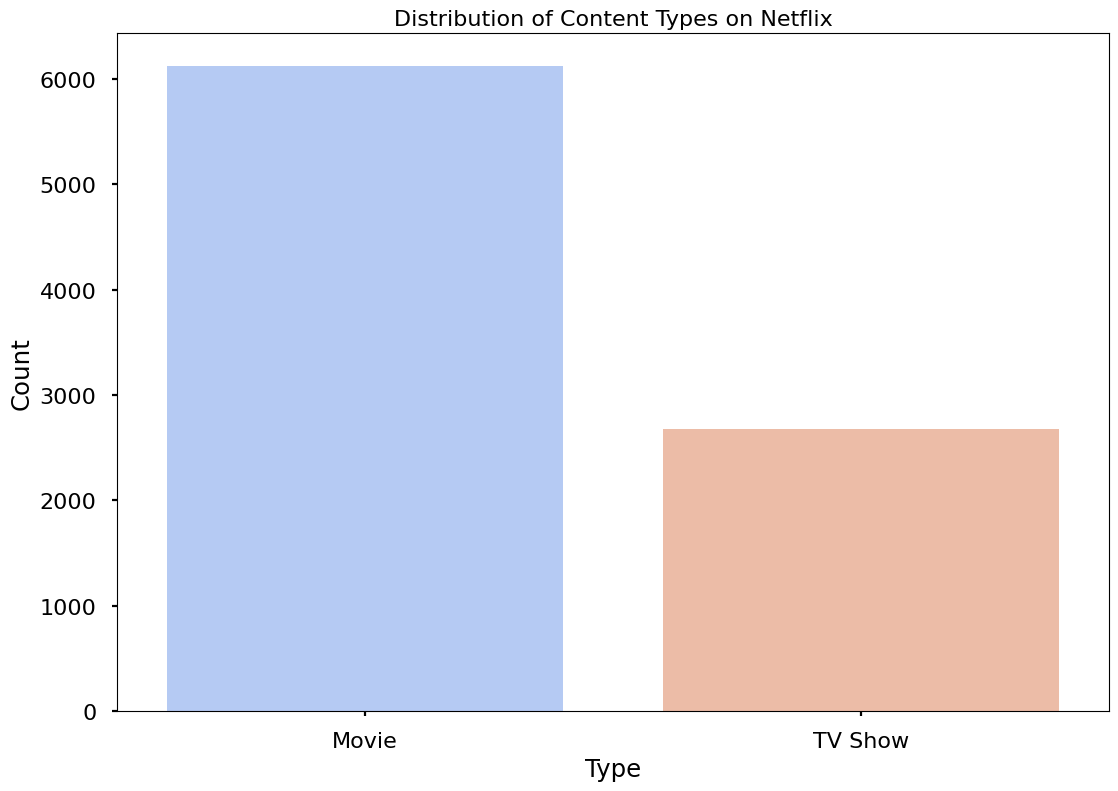

In [12]:
sns.countplot(data=df, x="type", palette="coolwarm")
plt.title("Distribution of Content Types on Netflix", fontsize=16)
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

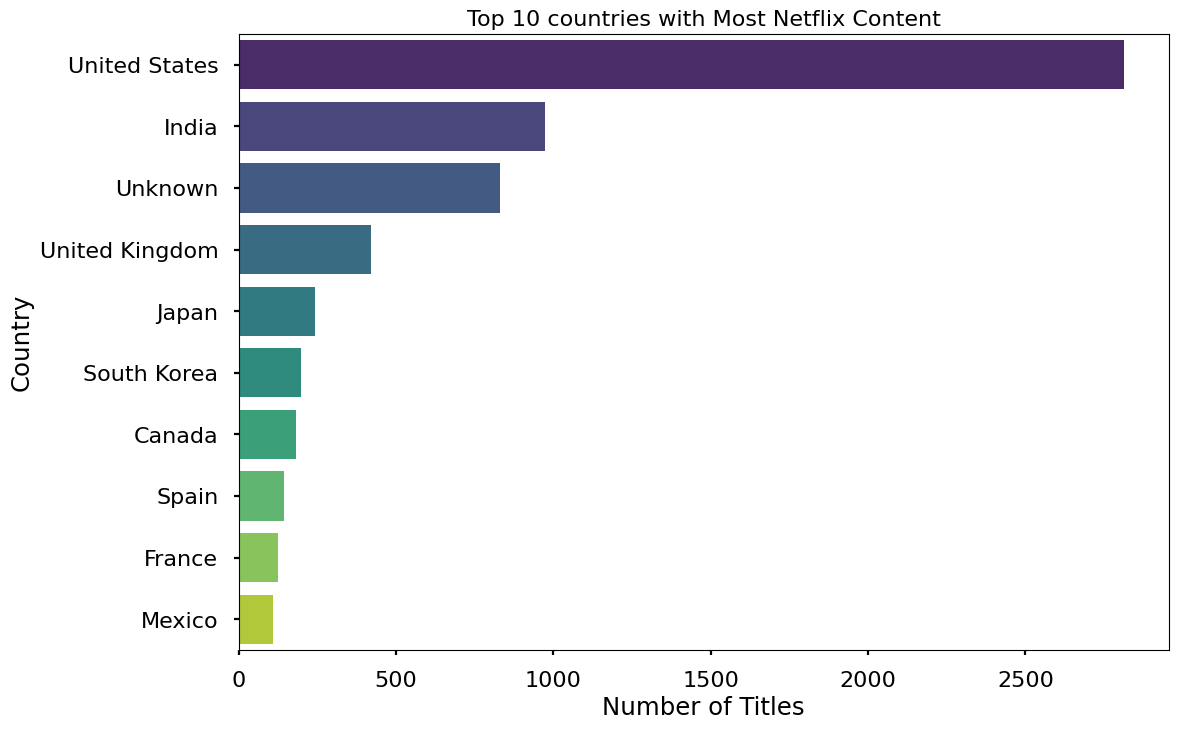

In [13]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 countries with Most Netflix Content", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

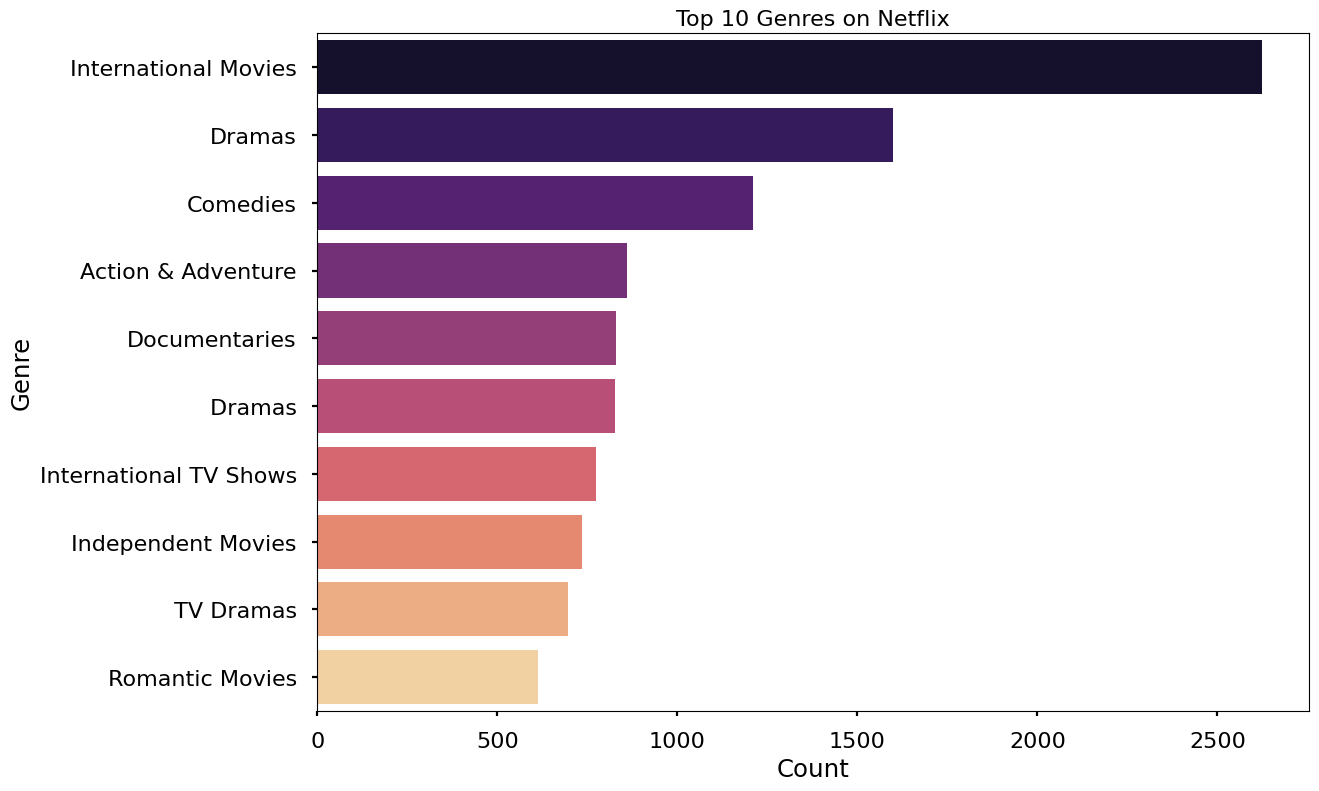

In [14]:
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(',')
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = Counter(flat_genres)

genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=genre_df, y='Genre', x='Count', palette='magma')
plt.title("Top 10 Genres on Netflix", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


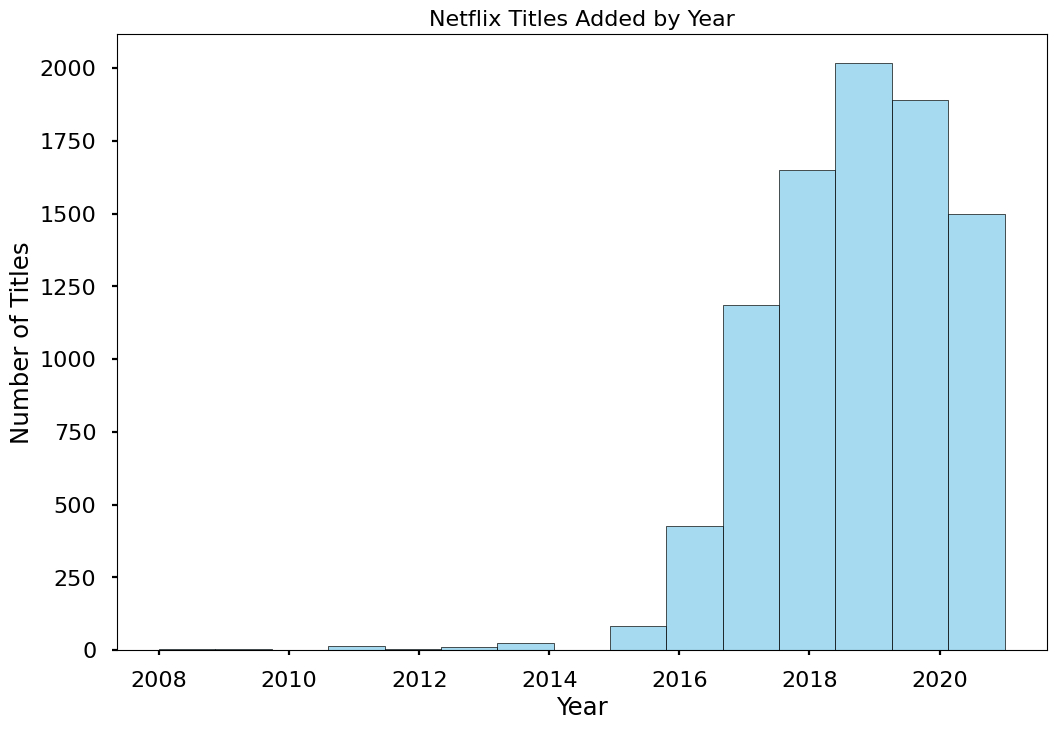

In [15]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

plt.figure(figsize=(12,8))
sns.histplot(df['year_added'].dropna(), bins=15, kde=False, color='skyblue')
plt.title("Netflix Titles Added by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

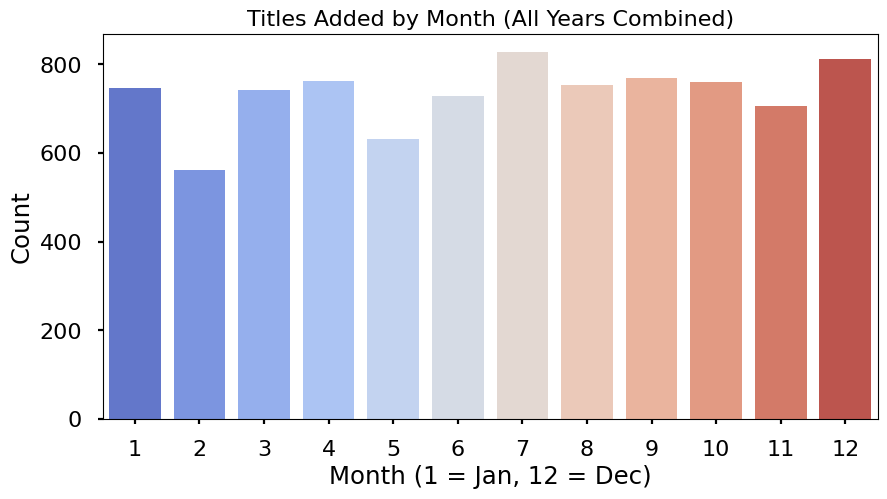

In [16]:
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

monthly = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly.index, y=monthly.values, palette='coolwarm')
plt.title("Titles Added by Month (All Years Combined)", fontsize=16)
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Count")
plt.show()


In [17]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})
df['country'] = df['country'].astype('category').cat.codes
df['rating'] = df['rating'].astype('category').cat.codes


In [19]:
target = 'type' 


In [20]:
features = ['release_year', 'country', 'rating', 'duration']


In [21]:
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)


In [22]:
features = ['release_year', 'country', 'rating', 'duration_mins']
X = df[features]
y = df['type']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9977272727272727
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.99      1.00      1.00       544

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



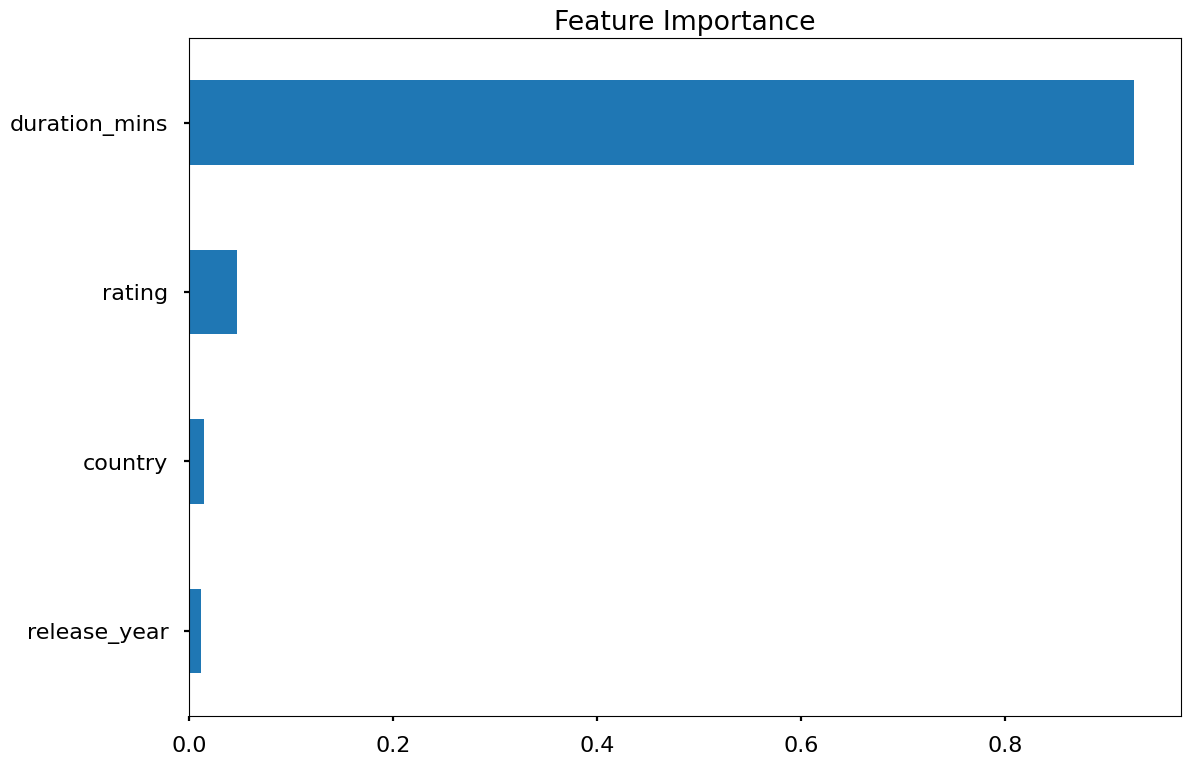

In [26]:


feat_importance = pd.Series(model.feature_importances_, index=features)
feat_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


In [27]:
import joblib
joblib.dump(model, 'netflix_type_classifier.pkl')


['netflix_type_classifier.pkl']

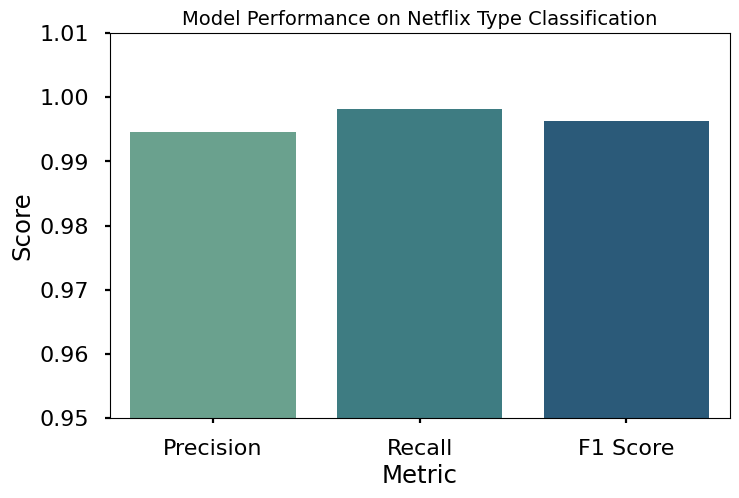

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for both classes (binary)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Prepare data
metrics = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics, x='Metric', y='Score', palette='crest')
plt.ylim(0.95, 1.01)
plt.title("Model Performance on Netflix Type Classification", fontsize=14)
plt.ylabel("Score")
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.9982954545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.99      1.00      1.00       544

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.9965909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.99      1.00      0.99       544

    accuracy                           1.00      1760
   macro avg       0.99      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



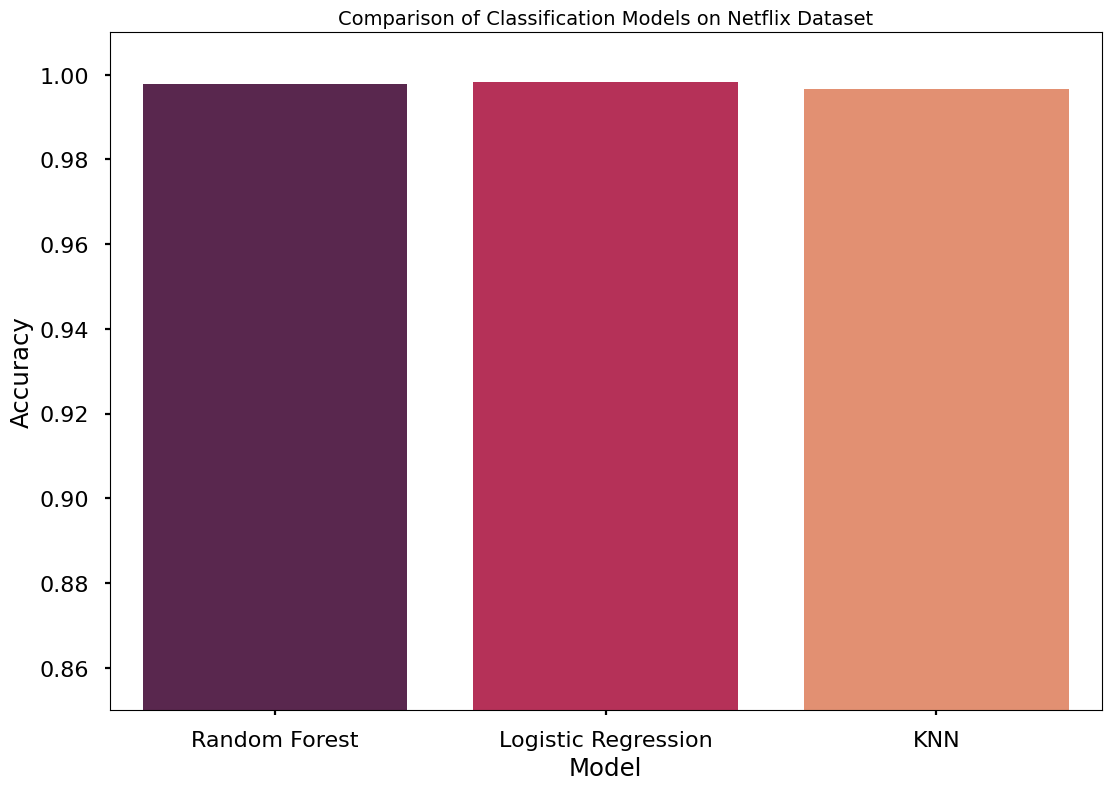

In [31]:
models = ['Random Forest', 'Logistic Regression', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, knn_pred)
]

acc_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

sns.barplot(data=acc_df, x='Model', y='Accuracy', palette='rocket')
plt.ylim(0.85, 1.01)
plt.title("Comparison of Classification Models on Netflix Dataset", fontsize=14)
plt.show()
